# Training with ImageDataGenerator

download horse-or-human.zip: open cmd and run this command below (in window sys):  
curl -o horse-or-human.zip https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
  
download validation-horse-or-human.zip: open cmd and run this command below (in window sys ):  
curl -o validation-horse-or-human.zip https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


In [1]:
import os

#directory with training horses pictures
train_horse_dir = os.path.join('E:/machine learning/Course 1/horse-or-human/horses')

#directory with training human pitures
train_human_dir = os.path.join('E:/machine learning/Course 1/horse-or-human/humans')

#directory with validation horses pictures
validation_horse_dir = os.path.join('E:/machine learning/Course 1/validation-horse-or-human/horses/')

#directory with validation human pictures
validation_human_dir = os.path.join('E:/machine learning/Course 1/validation-horse-or-human/humans/')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_name = os.listdir(validation_human_dir)
print(validation_human_name[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    #this input shape is desired size of 300x300 cells and 3 bytes colors
    # the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #the second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten layers to feed the output
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

## Data preprocessing
Next step is to set up the data generators that will read pictures in the source folders, convert them to *float32* tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the *[0, 1]* range (originally all values are in the *[0, 255]* range).

In Keras, this can be done via the *keras.preprocessing.image.ImageDataGenerator* class using the *rescale* parameter. This *ImageDataGenerator class* allows you to instantiate generators of augmented image batches (and their labels) via *.flow(data, labels)* or *.flow_from_directory(directory)*.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1/255.
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1/255)

#flow training data in batches of 128 using train data generator
train_generator = train_datagen.flow_from_directory(
    'E:/machine learning/Course 1/horse-or-human/', #source directory for image data
    target_size=(300, 300),
    batch_size=128,
    #since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

#flow validation data in batches of 128 using validation data generator
validation_generator = validation_datagen.flow_from_directory(
    'E:/machine learning/Course 1/validation-horse-or-human/', # source directory for image data
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [26]:
EPOCHS=20

history = model.fit(
    train_generator, 
    steps_per_epoch=8,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/20
8/8 [==============================] - 69s 8s/step - loss: 0.3233 - accuracy: 0.8632 - val_loss: 1.5420 - val_accuracy: 0.6992
Epoch 2/20
8/8 [==============================] - 67s 10s/step - loss: 0.3404 - accuracy: 0.8432 - val_loss: 2.2339 - val_accuracy: 0.6016
Epoch 3/20
8/8 [==============================] - 62s 7s/step - loss: 0.2635 - accuracy: 0.8854 - val_loss: 4.9171 - val_accuracy: 0.5430
Epoch 4/20
8/8 [==============================] - 61s 7s/step - loss: 0.3626 - accuracy: 0.8643 - val_loss: 1.3167 - val_accuracy: 0.7266
Epoch 5/20
8/8 [==============================] - 61s 7s/step - loss: 0.2635 - accuracy: 0.8899 - val_loss: 1.0334 - val_accuracy: 0.7031
Epoch 6/20
8/8 [==============================] - 61s 7s/step - loss: 0.3505 - accuracy: 0.8721 - val_loss: 1.3288 - val_accuracy: 0.7578
Epoch 7/20
8/8 [==============================] - 64s 9s/step - loss: 0.3527 - accuracy: 0.8621 - val_loss: 1.6797 - val_accuracy: 0.6602
Epoch 8/20
8/8 [=================

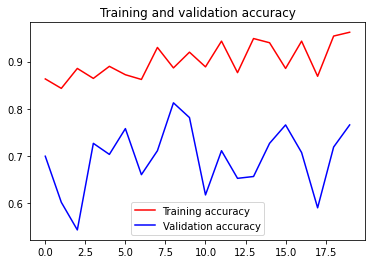

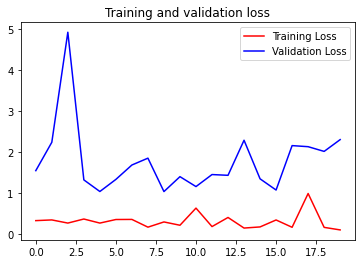

In [29]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()